In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## core model

In [2]:
def CNN_model(input_features, input_shape=(512, 512, 3)):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = keras.layers.Conv2D(32, (3, 3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    x = keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Conv2D(128, (3, 3), padding='same')(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Conv2D(256, (3, 3), padding='same')(x)
    x = keras.layers.Conv2D(256, (3, 3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Dense(512)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(input_features, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    return model

Found 17754 files belonging to 2 classes.
Classes: ['train', 'val']


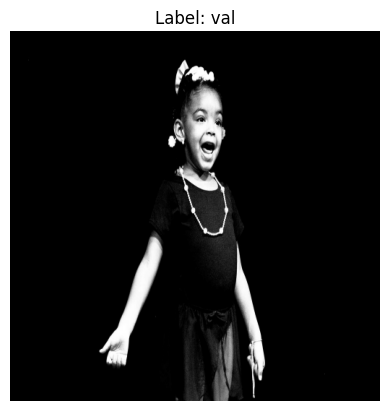

In [3]:
# Dataset Loading and Visualization
data_dir = "images"
img_height, img_width = 512, 512
batch_size = 1

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

class_names = dataset.class_names
print("Classes:", class_names)

# Take one sample image
for images, labels in dataset.take(1):
    sample_image = images[0]
    plt.imshow(sample_image.numpy().astype("uint8"))
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.axis("off")
    plt.show()

In [5]:
# Model Instantiation
num_classes = len(class_names)
model = CNN_model(input_features=num_classes, input_shape=(512, 512, 3))


In [6]:
# Feature Map Extraction Model
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [7]:
#  Feature Map Visualization Function
def plot_feature_maps(feature_map, layer_name, num_cols=8):
    fmap = feature_map[0]   # remove batch dimension
    num_filters = fmap.shape[-1]
    num_rows = int(np.ceil(num_filters / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for i in range(num_filters):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(fmap[:, :, i], cmap="viridis")
        ax.axis("off")
    # Hide unused subplots
    for j in range(num_filters, num_rows * num_cols):
        axes[j // num_cols, j % num_cols].axis("off")
    plt.suptitle(f"Feature maps - {layer_name}", fontsize=16)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


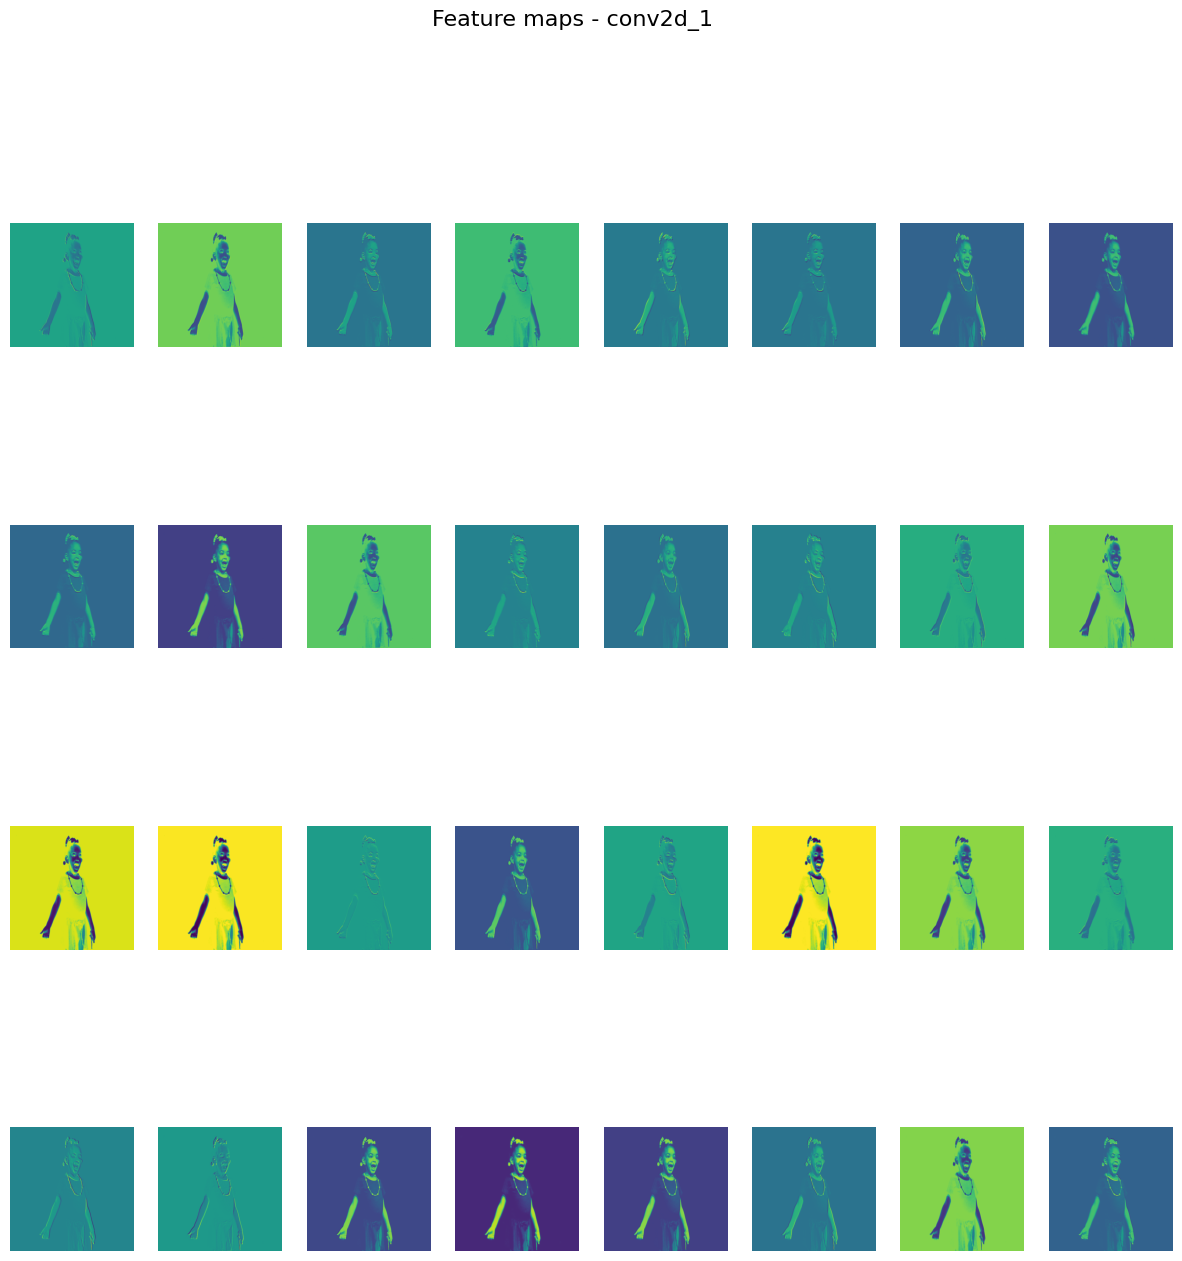

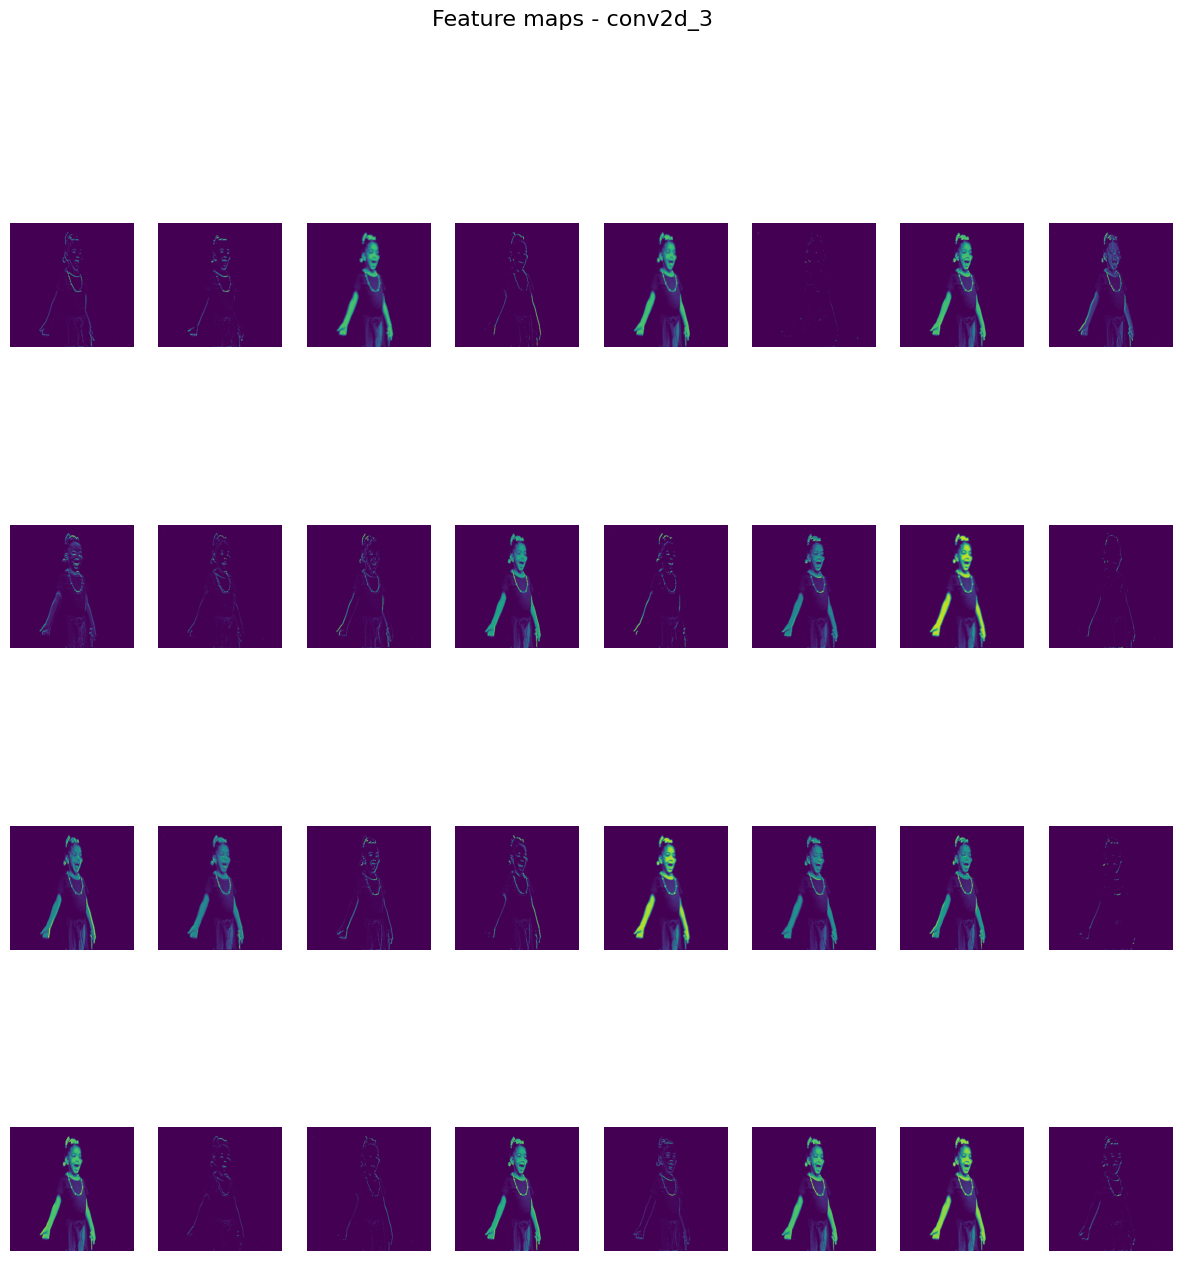

In [8]:
# Run Feature Map Extraction and Plot
# Preprocess sample image for model input
sample_input = tf.expand_dims(sample_image, axis=0)  # add batch dimension if not present

# Get feature maps
feature_maps = activation_model.predict(sample_input)

# Visualize feature maps for first and third conv layers (adjust indices as needed)
plot_feature_maps(feature_maps[0], "conv2d_1")
plot_feature_maps(feature_maps[2], "conv2d_3")